# Best features predicting prevalence of mental health issues at county level based on Social Determinants of Health

__[GitHub: SocialHealthAI/SDOH-Models](https://github.com/SocialHealthAI/SDOH-Models)__

## Overview

The best features for predicting the prevalence (percent) of mental health issues at county level are determined using Social Determinates of Health.  Prevalence data is obtained from the <b>CDC PLACES: Local Data for Better Health, County</b>.  The measure is not good mental health for 14 or more days for adults 18 years or older.  SDOH features are obtained from the  <b>Agency for Healthcare Research and Quality</b> (AHRQ).

# Set up Environment

In [15]:
%run ../../environment/env1.ipynb

# Extract, transform and load data

## CDC Places mental health issues prevalence
Call CDC Places Data notebook using year and measure parameters.

In [46]:
parm_CDCPlaces_years = ['2020']
parm_CDCPlaces_measure_id = 'MHLTH'
%run ../../etl/dataCDCPlaces.ipynb
dfCDCPlaces = out_CDCPlaces()
pd.options.display.max_rows = 10
dfCDCPlaces

,MHLTH,YEAR,STATE,COUNTY,FIPS
0,14.4,2020,Wyoming,Niobrara,56027
1,14.1,2020,Wyoming,Hot Springs,56017
2,14.4,2020,Wyoming,Fremont,56013
3,13.8,2020,Wyoming,Big Horn,56003
4,12.8,2020,Wyoming,Sublette,56035
...,...,...,...,...,...
6283,16.4,2020,Alabama,Chambers,1017
6284,18.1,2020,Alabama,Sumter,1119
6285,17.1,2020,Alabama,Walker,1127
6286,16.8,2020,Alabama,Hale,1065


## AHRQ Data
Call AHRQ SDOH Data notebook using year parameter, survey list parameter and question list parameter.

In [42]:
parm_AHRQCountySDOH_years = ['2020']
# currently not including NOAAC - temperature by month
parm_AHRQCountySDOH_surveys = ["ACS", "AHA", "AMFAR", "CCBP", "CDCSVI", "CEN", "CRDC", "EPAA", "FARA", "FEA", "HHC", "HIFLD", "HRSA", "MHSVI", "MP", "NCHS", "NEPHTN", "NHC", "NOAAS", "POS", "SAHIE", "SAIPE", "SEDA"]
parm_AHRQCountySDOH_questions = ["CDCW_INJURY_DTH_RATE", "CDCW_TRANSPORT_DTH_RATE", "CDCW_SELFHARM_DTH_RATE", "CDCW_ASSAULT_DTH_RATE"]
%run ../../etl/dataAHRQCountySDOH.ipynb
dfAHRQCountySDOH = out_AHRQCountySDOH()

## Merge Data and Create Training Sets

In [43]:
dfMerged = pd.merge(dfAHRQCountySDOH, dfCDCPlaces, how='inner', left_on=['STATE','COUNTY', 'YEAR'], right_on = ['STATE','COUNTY', 'YEAR'])
X = dfMerged.drop(["MHLTH", "STATE", "COUNTY", "FIPS", "YEAR"], axis = 1)
Y = dfMerged["MHLTH"]

# Feature Selection

## Random Forest Regressor feature selection

Call Random Forest Regression Features notebook with features and target dataframe parameters.

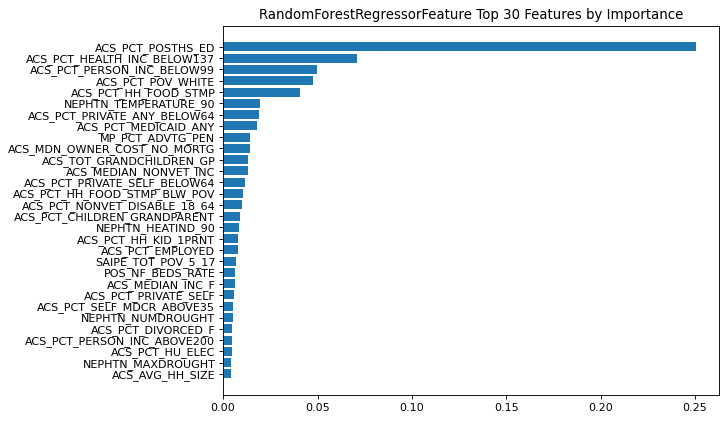

R2 Score:  0.8907454631273206


In [47]:
parm_features_RandomForestReg_X = X # features dataframe
parm_features_RandomForestReg_Y = Y # target dataframe

%run ../../features/features_RandomForestReg.ipynb
listSelectedFeatures = out_features_RandomForestReg_X()
print("R2 Score: ", out_features_RandomForestReg_X_R2())

## Mutual Information Regression feature selection

Call Mutual Information Regression Features notebook with features and target dataframe parameters.

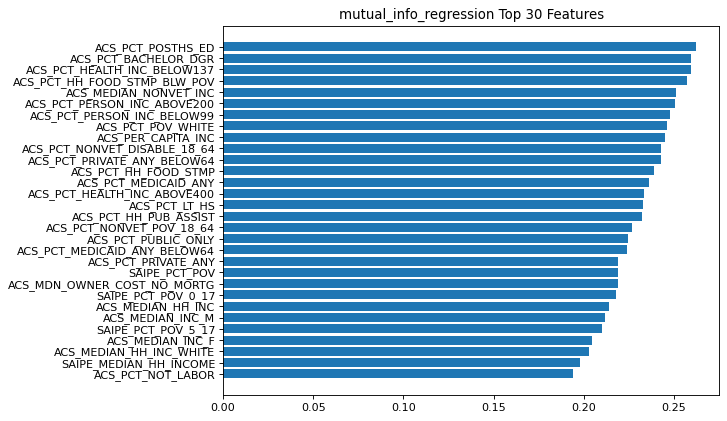

In [45]:
parm_features_MutualInformationReg_X = X # features dataframe
parm_features_MutualInformationReg_Y = Y # target dataframe
%run ../../features/features_MutualInformationReg.ipynb
listSelectedFeatures = out_features_MutualInformationReg_X()[0:30]